In [3]:
# collection
from connections import get_dataframe
df = get_dataframe() # dataset database(mysql), table `ph-student_employability-dataset`

df['CLASS'] = df['CLASS'].map({'Employable': 1, 'LessEmployable': 2})

In [4]:
# splitting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop(['Name of Student', 'CLASS'], axis=1)
y = df['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_Train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier()
rf_class.fit(X_Train_balanced, y_train_balanced)
y_pred = rf_class.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf

Accuracy: 0.914572864321608
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.90      0.92       332
           2       0.88      0.94      0.91       265

    accuracy                           0.91       597
   macro avg       0.91      0.92      0.91       597
weighted avg       0.92      0.91      0.91       597



array([[298,  34],
       [ 17, 248]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

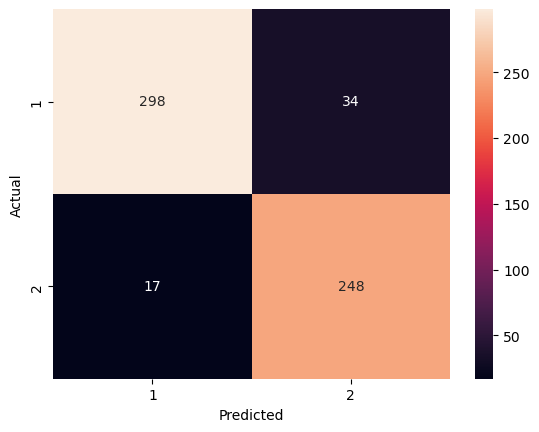

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_labels = np.unique(y)


sns.heatmap(conf, annot=True, xticklabels=class_labels, yticklabels=class_labels, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')